# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL per month** per seller

#### Costs
_Estimated_ **reputation costs** of orders with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We make an assumption about the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
 '2 stars': 50
 '3 stars': 40
 '4 stars': 0
 '5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that have ever joined the platform, as well as with the square root of the total cumulated number of items that were ever sold.

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both the number of sellers to manage and the number of sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.
- Because the carrier's delivery time is out of Olist's direct control, improving it is not a quick-win recommendation.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments in the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below.

💪 But feel free to investigate other hypothesis instead with part 3.

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worst sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` the seller brings
- the `review_costs` associated with the seller's bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need.


⚠️ Don't start from scratch, update your existing package! 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.seller import Seller

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Write a function that will calculate IT costs based on two parameters: number of sellers and number of items.

2️⃣ Load the sellers data and sort them by decreasing profits (before IT costs).

3️⃣ Calculate profits:
   - Calculate the cumulative profits for each row.
   - Calculate the cumulative IT costs for each row using the function you defined before.
   - Calculate the cumulative net profit for each row.

4️⃣ Plot your results, and analyze them.

5️⃣ Determine the optimum number of sellers to keep, based on profits before and after IT costs. (Hint: look up `np.argmax`). What would have been the impact on:
   - Net profit after IT costs?
   - Net profit before IT costs
   - IT costs?
   - Total revenues?
   - Number of sellers?
   - Number of items sold?

6️⃣ How important were the IT costs in your analysis?

#### Step 1️⃣

In [2]:
# 1️⃣ Write a function that will calculate IT costs based on two parameters
def calculate_it_costs(n_sellers, n_items):
    alpha = 3157.27
    beta = 978.23
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

# Test with examples from the challenge
print(f"1000 sellers, 100 items: {calculate_it_costs(1000, 100):,.0f} BRL")
print(f"100 sellers, 1000 items: {calculate_it_costs(100, 1000):,.0f} BRL")

1000 sellers, 100 items: 109,624 BRL
100 sellers, 1000 items: 62,507 BRL


#### Step 2️⃣ (Load the sellers data and sort them by decreasing profits (before IT costs)


In [13]:
seller = Seller()
df = seller.get_training_data()
df

/home/emtenan/code/Emtenan12/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay = ship.groupby('seller_id').apply(delay_to_logistic_partner).reset_index()
/home/emtenan/code/Emtenan12/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wait = ship.groupby('seller_i

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,cost_of_reviews,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.00,0.33,0.33,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.55,0.72,0.05,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.00,1.00,0.00,0,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.00,1.00,0.00,0,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.00,0.00,1.00,100,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.00,1.00,0.00,0,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.10,0.50,0.10,140,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.00,1.00,0.00,0,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.25,0.50,0.00,50,349.700,299.700


In [14]:
print(f"Total sellers: {len(df)}")
print(f"Total items sold: {df['quantity'].sum():,.0f}")

# Sort by profits (highest to lowest)
df_sorted = df.sort_values('profits', ascending=False).reset_index(drop=True)

print("\nTop 5 most profitable sellers:")
print(df_sorted[['seller_id', 'revenues', 'cost_of_reviews', 'profits']].head())

Total sellers: 2967
Total items sold: 112,441

Top 5 most profitable sellers:
                          seller_id   revenues  cost_of_reviews    profits
0  53243585a1d6dc2643021fd1853d8905  23237.605             5170  18067.605
1  7e93a43ef30c4f03f38b393420bc753a  19323.187             4700  14623.187
2  fa1c13f2614d7b5c4749cbc52fecda94  21004.203             6510  14494.203
3  edb1ef5e36e0c8cd84eb3c9b003e486d   8808.455             1520   7288.455
4  46dc3b2cc0980fb8ec44634e21d2718e  14651.119             7500   7151.119


#### Step 3️⃣

In [5]:
# 3️⃣ Calculate profits:
# Calculate the cumulative profits for each row
df_sorted['cumul_profits'] = df_sorted['profits'].cumsum()

# Calculate the cumulative IT costs for each row using the function i defined before
df_sorted['cumul_sellers'] = range(1, len(df_sorted) + 1)
df_sorted['cumul_items'] = df_sorted['quantity'].cumsum()

df_sorted['cumul_it_costs'] = [calculate_it_costs(s, i) for s, i in 
                               zip(df_sorted['cumul_sellers'], df_sorted['cumul_items'])]

# Calculate the cumulative net profit for each row
df_sorted['net_profit'] = df_sorted['cumul_profits'] - df_sorted['cumul_it_costs']

print("Cumulative calculations completed!")

Cumulative calculations completed!


#### Step 4️⃣

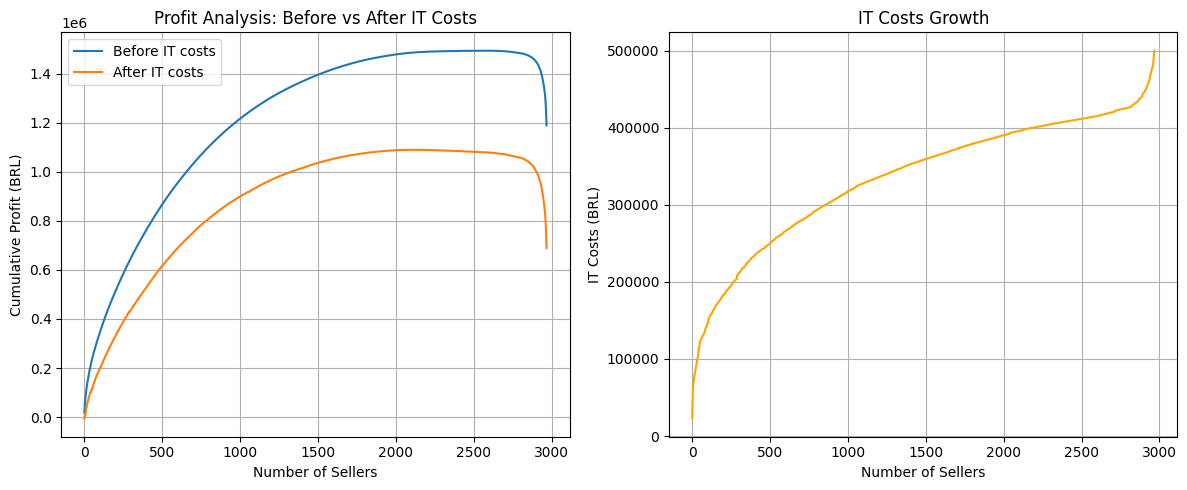

In [7]:
# 4️⃣ Plot your results, and analyze them
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_sorted['cumul_sellers'], df_sorted['cumul_profits'], label='Before IT costs')
plt.plot(df_sorted['cumul_sellers'], df_sorted['net_profit'], label='After IT costs')
plt.xlabel('Number of Sellers')
plt.ylabel('Cumulative Profit (BRL)')
plt.title('Profit Analysis: Before vs After IT Costs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_sorted['cumul_sellers'], df_sorted['cumul_it_costs'], color='orange')
plt.xlabel('Number of Sellers')
plt.ylabel('IT Costs (BRL)')
plt.title('IT Costs Growth')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Step 5️⃣

In [8]:
# 5️⃣ Determine the optimum number of sellers to keep, based on profits before and after IT costs
# (Hint: look up np.argmax)
optimal_idx = np.argmax(df_sorted['net_profit'])
optimal_sellers = optimal_idx + 1

print(f"Optimal number of sellers: {optimal_sellers}")

# Impact analysis
optimal_row = df_sorted.iloc[optimal_idx]

print(f"\nWhat would have been the impact on:")
print(f"• Net profit after IT costs: {optimal_row['net_profit']:,.0f} BRL")
print(f"• Net profit before IT costs: {optimal_row['cumul_profits']:,.0f} BRL")
print(f"• IT costs: {optimal_row['cumul_it_costs']:,.0f} BRL")
print(f"• Total revenues: {df_sorted['revenues'].sum():,.0f} BRL")
print(f"• Number of sellers: {optimal_sellers}")
print(f"• Number of items sold: {optimal_row['cumul_items']:,.0f}")

Optimal number of sellers: 2117

What would have been the impact on:
• Net profit after IT costs: 1,089,861 BRL
• Net profit before IT costs: 1,486,365 BRL
• IT costs: 396,504 BRL
• Total revenues: 2,807,418 BRL
• Number of sellers: 2117
• Number of items sold: 65,960


#### Step 6️⃣

In [10]:
# 6️⃣ How important were the IT costs in your analysis?
current_all_sellers = len(df)
current_net_all = df_sorted['net_profit'].iloc[-1]
improvement = optimal_row['net_profit'] - current_net_all
sellers_to_remove = current_all_sellers - optimal_sellers

print(f"Comparison with keeping all sellers:")
print(f"• Current (all {current_all_sellers} sellers): {current_net_all:,.0f} BRL")
print(f"• Optimized ({optimal_sellers} sellers): {optimal_row['net_profit']:,.0f} BRL")
print(f"• Improvement: +{improvement:,.0f} BRL")
print(f"• Sellers to remove: {sellers_to_remove}")

it_cost_importance = optimal_row['cumul_it_costs'] / optimal_row['cumul_profits'] * 100
print(f"\nIT costs represent {it_cost_importance:.1f}% of gross profits at optimal point")

if it_cost_importance > 15:
    print("IT costs are very significant in this analysis")
else:
    print("IT costs have moderate impact on the analysis")

Comparison with keeping all sellers:
• Current (all 2967 sellers): 689,209 BRL
• Optimized (2117 sellers): 1,089,861 BRL
• Improvement: +400,652 BRL
• Sellers to remove: 850

IT costs represent 26.7% of gross profits at optimal point
IT costs are very significant in this analysis


In [11]:
# Summary insights
unprofitable_sellers = (df['profits'] < 0).sum()

print("Final insights:")
print(f"• {unprofitable_sellers} sellers are currently unprofitable")
print(f"• Remove {sellers_to_remove} worst performing sellers")
print(f"• This increases net profit by {improvement:,.0f} BRL")
print(f"• IT costs scale with √(sellers) + √(items), creating optimization opportunity")
print("• Recommendation: Focus on seller quality over quantity")

Final insights:
• 371 sellers are currently unprofitable
• Remove 850 worst performing sellers
• This increases net profit by 400,652 BRL
• IT costs scale with √(sellers) + √(items), creating optimization opportunity
• Recommendation: Focus on seller quality over quantity


## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after a honeymoon period of a few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪